# Лабораторная работа №7
## Задание 1

In [41]:
from sklearn.datasets import load_files
reviews_train = load_files("C:\\Users\\User\\Downloads\\Telegram Desktop\\aclImdb_v1\\aclImdb\\train\\")

text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b" <br />", b" ") for doc in text_train]



In [42]:
reviews_test = load_files("C:\\Users\\User\\Downloads\\Telegram Desktop\\aclImdb_v1\\aclImdb\\test\\")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b" <br />", b" ") for doc in text_test]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer(max_features=10000, max_df=0.15)
X = vect.fit_transform(text_train)

In [44]:
from sklearn.decomposition import LatentDirichletAllocation
lda= LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)
document_topics= lda.fit_transform(X)

In [45]:
lda.components_.shape

(10, 10000)

In [46]:
import numpy as np
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names=np.array(vect.get_feature_names_out())

In [47]:
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        guy           us            show          didn          
10            re            world         series        actors        
game          pretty        war           episode       worst         
lot           sex           our           tv            book          
effects       around        american      family        minutes       
pretty        nothing       documentary   shows         am            
fun           budget        history       episodes      saw           
didn          stupid        real          funny         nothing       
original      worst         country       children      thought       
special       actually      black         years         actually      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
dire

In [48]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=10, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [49]:
import numpy as np
topics = np.array([7,16,24,25,28,36,37,45,51,53,54,63,89,97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
allen         budget        italian       island        town          vampire       game          
woody         dvd           cannibal      plane         western       women         animation     
rose          low           franco        captain       west          devil         games         
chaplin       video         virus         flight        sheriff       demon         play          
new           production    jungle        harvey        mexican       girl          fantasy       
woman         store         circus        pirates       gold          vampires      graphics      
real          copy          freaks        pirate        young         hot           video         
wife          quality       tribe         airport       westerns      horror        computer      
screen    

In [50]:
music = np.argsort(document_topics100[:, 45])[::-1]

for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2])+ b".\n")

b"Che is a good film for chronicling the events leading to the Cuban Revolution and certainly has a mystic potency surrounding Che and his political ideals. However there is no emotional core or compassionate deliverance to make this anything more than interesting, and is a friendly inspection of Che's mindset rather than anything inspiring.\n"
b'Smug and dull, Gere brings no sparkle and no real fear or tragedy and no-one else does any better. Most minor parts simply one dimensional, certainly not simply xenophobic but somehow no better than that in its dull thoughtlessness and passionlessness.\n'
b'A superior work that takes itself seriously, but avoids the tiresome moralizing so often accompnaying American films of the same subject matter. See it if you can.\n'
b"If you were to cut an hour of this movie you might have something a little bit entertaining, although even then I don't think you'd have anything memorable. But at its full, seemingly endless length this movie just meanders 

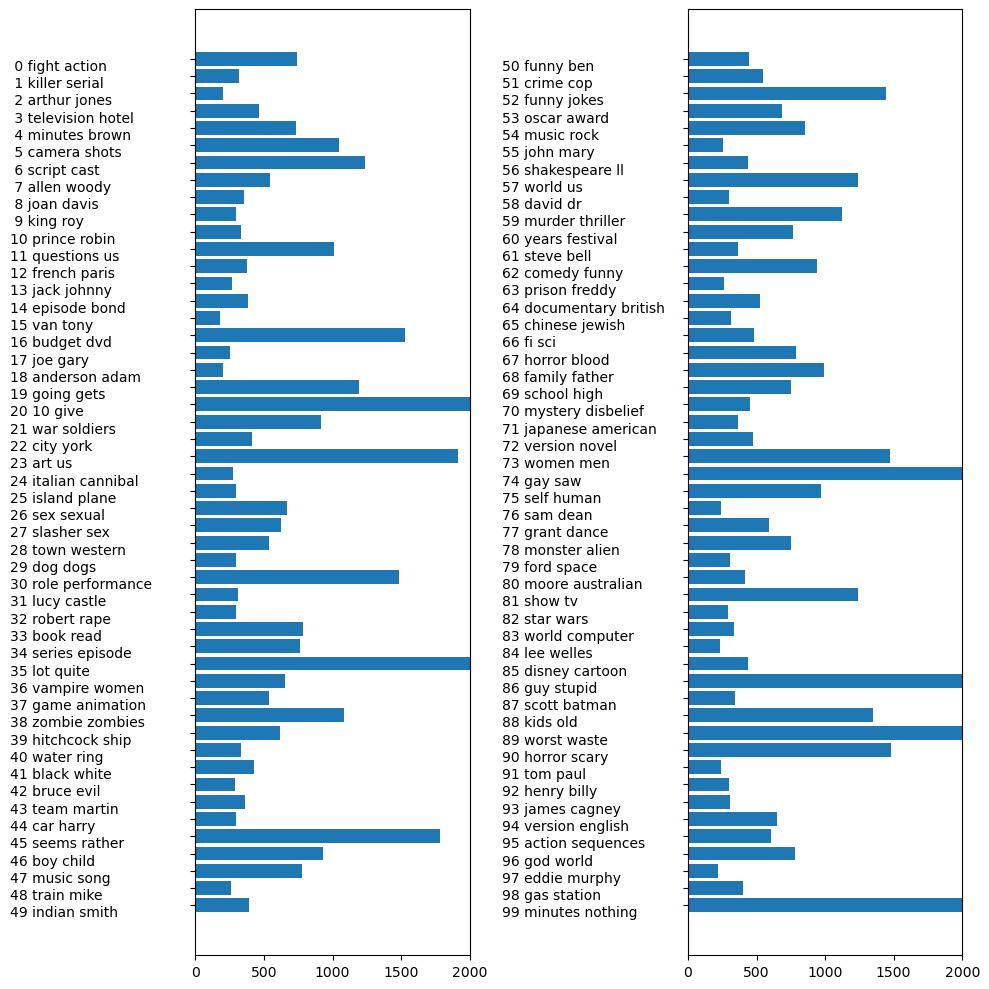

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i)+" ".join(words)
              for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col +1)*50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

## Задание 2

In [21]:
bards_words = [
    "The story and characters were incredibly engaging.",
    "Absolutely loved this book, highly recommended!",
    "A masterpiece of storytelling. Brilliantly written.",
    "The plot twists kept me hooked until the very end.",
    "I wouldn't recommend this book to anyone. Disappointing.",
    "I didn't care for the author's storytelling approach.",
    "I couldn't get enough of this book. Just wonderful!",
    "A must-read for anyone who loves a great story.",
    "Captivating from start to finish. Truly impressive.",
    "The author's writing style is simply beautiful.",
    "One of the best books I've ever read. So captivating!",
    "The depth of characters and emotions was astounding.",
    "This book exceeded all my expectations. Incredible!",
    "I was disappointed by this book. Didn't live up to the hype.",
    "The story felt flat and the characters were uninteresting.",
    "I struggled to get through this book. Not enjoyable.",
    "The writing style was dry and uninspiring.",
    "This book was a letdown. Expected much more.",
    "I found it hard to connect with the characters or the plot.",
    "Boring and tedious. I couldn't wait to finish it.",
    "Super.",
    "The book felt like a slog to get through. Uninspired.",
    "Overall, a forgettable book that didn't leave an impact.",
    "The book failed to engage me. Not worth the time.",
    "This book was fantastic! Couldn't put it down!",
]




In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Создаем экземпляр CountVectorizer и преобразуем отзывы в мешок слов
vect = CountVectorizer()
vect.fit(bards_words)


CountVectorizer()

In [23]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря: {}".format(vect.vocabulary_))

Размер словаря: 116
Содержимое словаря: {'the': 92, 'story': 85, 'and': 3, 'characters': 17, 'were': 108, 'incredibly': 54, 'engaging': 29, 'absolutely': 0, 'loved': 63, 'this': 93, 'book': 10, 'highly': 48, 'recommended': 80, 'masterpiece': 65, 'of': 72, 'storytelling': 86, 'brilliantly': 13, 'written': 115, 'plot': 76, 'twists': 98, 'kept': 58, 'me': 66, 'hooked': 49, 'until': 102, 'very': 105, 'end': 27, 'wouldn': 113, 'recommend': 79, 'to': 96, 'anyone': 4, 'disappointing': 23, 'didn': 21, 'care': 16, 'for': 41, 'author': 7, 'approach': 5, 'couldn': 19, 'get': 45, 'enough': 31, 'just': 57, 'wonderful': 111, 'must': 69, 'read': 78, 'who': 109, 'loves': 64, 'great': 46, 'captivating': 15, 'from': 44, 'start': 84, 'finish': 39, 'truly': 97, 'impressive': 52, 'writing': 114, 'style': 88, 'is': 55, 'simply': 81, 'beautiful': 8, 'one': 73, 'best': 9, 'books': 11, 've': 104, 'ever': 32, 'so': 83, 'depth': 20, 'emotions': 26, 'was': 107, 'astounding': 6, 'exceeded': 33, 'all': 1, 'my': 70,

In [24]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <25x116 sparse matrix of type '<class 'numpy.int64'>'
	with 190 stored elements in Compressed Sparse Row format>


In [25]:
print("плотное представление bag_of_words:\n{}".format(bag_of_words.toarray()))

плотное представление bag_of_words:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
from sklearn.datasets import load_files

feature_names = vect.get_feature_names_out()
print("количество признаков: {}".format(len(feature_names)))
print("первые 20 признаков:\n{}".format(feature_names[:20]))


количество признаков: 116
первые 20 признаков:
['absolutely' 'all' 'an' 'and' 'anyone' 'approach' 'astounding' 'author'
 'beautiful' 'best' 'book' 'books' 'boring' 'brilliantly' 'by'
 'captivating' 'care' 'characters' 'connect' 'couldn']


## Задание 3

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print("количество стоп-слов: {}".format(len(ENGLISH_STOP_WORDS)))
print("каждое 10-е стоп-слово: {}".format(list(ENGLISH_STOP_WORDS)[::10]))
# Применение стоп-слов


vect = CountVectorizer(min_df=5, stop_words='english').fit(bards_words)
X_train1 = vect.transform(bards_words)

# Вывод словаря (опционально)
print("X_train с использованием стоп-слов:\n{}".format(repr(X_train1)))


количество стоп-слов: 318
каждое 10-е стоп-слово: ['in', 'first', 'not', 'this', 'detail', 'give', 'etc', 'sometime', 'for', 'some', 'ie', 'but', 'eg', 'done', 'something', 'whereby', 'eleven', 'mine', 'go', 'moreover', 'still', 'from', 'fifteen', 'another', 'should', 'five', 'anything', 'may', 'due', 'ever', 'one', 'two']
X_train с использованием стоп-слов:
<25x1 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>


In [54]:
X_train.toarray()

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

## Задание 4

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Создание TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(bards_words)

# Вывод TF-IDF матрицы (опционально)
print("TF-IDF матрица:\n{}".format(repr(X_train_tfidf)))

TF-IDF матрица:
<25x1 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>


In [56]:
X_train_tfidf.toarray()

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

## Задание 5

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np


# Метки: 1 для положительных, 0 для отрицательных
labels = [1] * 12 + [0] * 13  # Предполагаем, что первые 12 отзывов - положительные

# Используем CountVectorizer для векторизации текстовых данных
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(bards_words)


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=20)


logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("Средняя правильность перекрестной проверки: {:.2f}".format(np.mean(scores)))


Средняя правильность перекрестной проверки: 0.65


In [58]:
from sklearn.linear_model import LogisticRegression

# Используем CountVectorizer для векторизации текстовых данных
vectorizer = CountVectorizer(min_df=5, stop_words='english')
X = vectorizer.fit_transform(bards_words)

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=20)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Вывод коэффициентов модели
print("Коэффициенты модели (веса):\n{}".format(logreg.coef_))


Коэффициенты модели (веса):
[[-1.10722705]]


In [59]:

# Оценка точности модели на тестовых данных
accuracy = logreg.score(X_test, y_test)
print("Точность модели на тестовых данных: {:.2f}".format(accuracy))


Точность модели на тестовых данных: 0.40


## Задание 6 выводы

Из представленных данных можно сделать следующие выводы:

Средняя правильность перекрестной проверки:
Полученное значение 0.65 означает, что модель достигла средней точности прогнозирования около 65% во время перекрестной проверки на обучающем наборе данных. Это значение указывает на то, что модель, обученная на этих данных, в среднем правильно классифицирует около 65% данных в каждом из пяти фолдов.

Точность модели на тестовых данных:
Значение точности модели на тестовых данных равно 0.40 или 40%. Это означает, что модель демонстрирует относительно низкую точность при предсказании на новых данных. Возможно, это связано с тем, что модель переобучилась на обучающих данных или имеет недостаточно хорошую обобщающую способность для предсказания на новых данных.

Коэффициенты модели:
Полученное значение коэффициента (-1.10722705) означает, что этот конкретный признак (скорее всего, отдельное слово или токен) имеет отрицательное влияние на предсказание модели. В данном случае, вероятно, наличие этого признака (слова) в тексте связано с отнесением его к отрицательному классу (0).

В целом, модель показывает среднюю точность на обучающих данных, но низкую точность на тестовых данных. Также, отрицательный коэффициент признака указывает на его связь с негативным классом.